<a href="https://colab.research.google.com/github/EllaThomasson/DS4002-Project3/blob/main/SCRIPTS/CNN_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# load in the dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_combined = np.concatenate((X_train, X_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)

CNN Code - NO CV

Loading MNIST dataset...
Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Training the model...
Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.8716 - loss: 0.4043
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.9838 - loss: 0.0533
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9893 - loss: 0.0349
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.9912 - loss: 0.0279
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9932 - loss: 0.0220
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9955 - loss: 0.0148
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.9950 - loss: 0.0159
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9965 - loss: 0.0114
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9880 - loss: 0.0400

Test accuracy: 0.9912


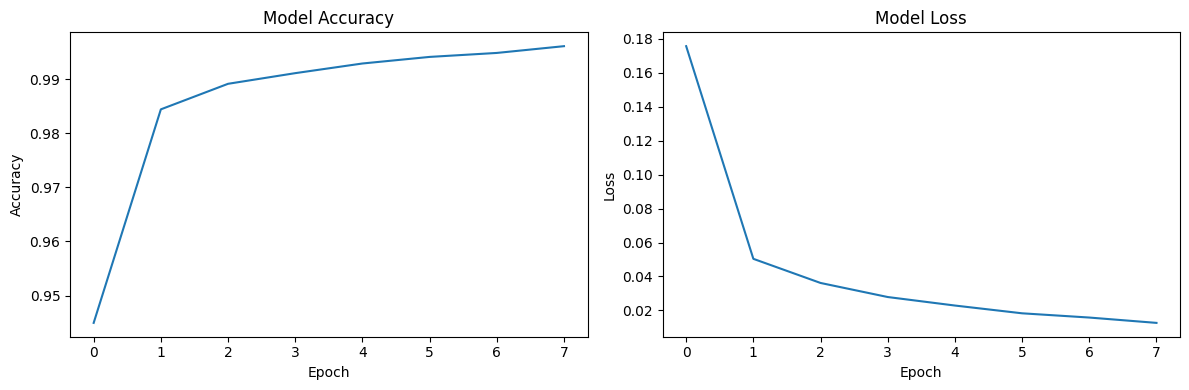

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


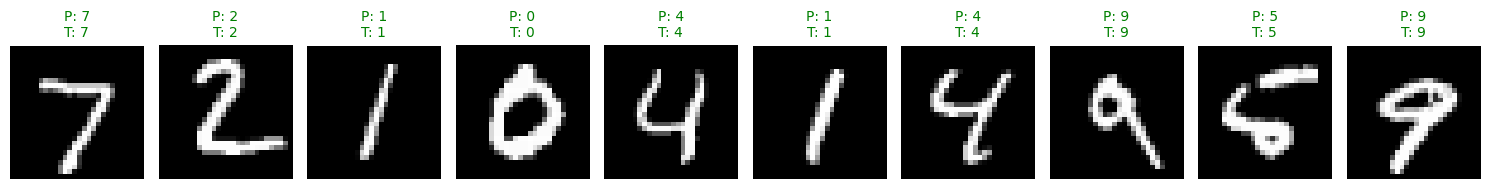

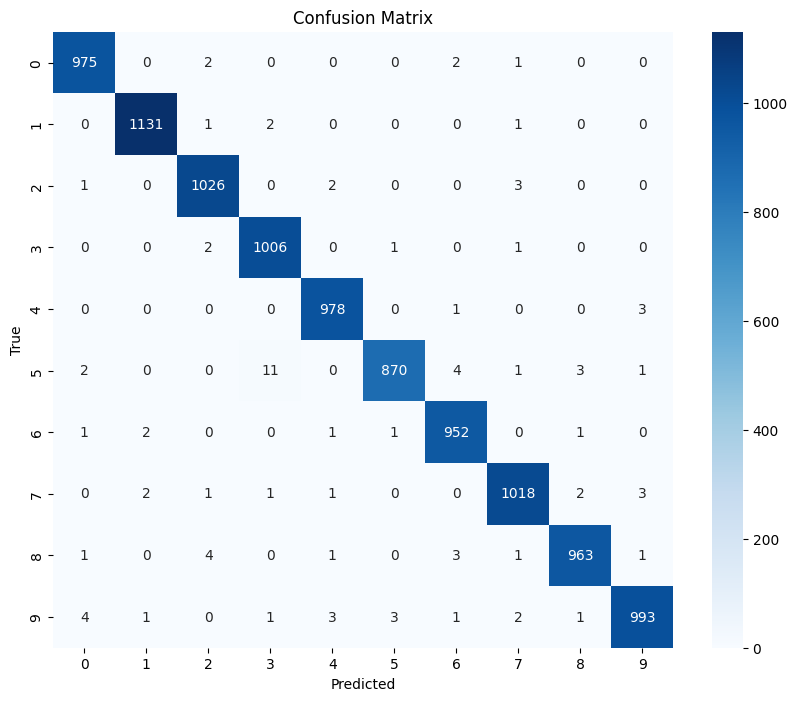

Model saved as 'mnist_cnn_model.h5'


In [10]:

# Load and prepare the MNIST dataset
print("Loading MNIST dataset...")
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the images to add the channel dimension (grayscale = 1 channel)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Print data shapes
print(f"Training data shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

# Define a simple CNN architecture
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten the output and add dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Display the model architecture
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model - simple approach without validation split
print("Training the model...")
history = model.fit(
    train_images, train_labels,
    epochs=8,
    batch_size=64
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

# Visualize training results
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

# Make predictions on test data
predictions = model.predict(test_images)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Function to visualize some predictions
def display_predictions(images, pred_classes, true_classes, n=10):
    class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    plt.figure(figsize=(15, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        color = 'green' if pred_classes[i] == true_classes[i] else 'red'
        plt.title(f"P: {class_names[pred_classes[i]]}\nT: {class_names[true_classes[i]]}",
                  color=color, fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display some example predictions
display_predictions(test_images, pred_classes, true_classes)

# Calculate and display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(10, 8))
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save the model
model.save('mnist_cnn_model.h5')
print("Model saved as 'mnist_cnn_model.h5'")




Adding Cross Validation and a Validation Set(to help us assess over/underfitting)

In [ ]:
# Load and prepare the MNIST dataset
print("Loading MNIST dataset...")
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the images to add the channel dimension (grayscale = 1 channel)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels_categorical = to_categorical(train_labels, 10)
test_labels_categorical = to_categorical(test_labels, 10)

# Print data shapes
print(f"Training data shape: {train_images.shape}")
print(f"Training labels shape: {train_labels_categorical.shape}")
print(f"Test data shape: {test_images.shape}")
print(f"Test labels shape: {test_labels_categorical.shape}")

# Define function to create model (we'll reuse this for each fold)
def create_model():
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        # Second convolutional layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Third convolutional layer
        layers.Conv2D(64, (3, 3), activation='relu'),

        # Flatten the output and add dense layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# K-fold Cross Validation
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
fold_histories = []
fold_scores = []

# Perform k-fold cross-validation
fold_no = 1
for train_idx, val_idx in kfold.split(train_images):
    print(f'\nTraining fold {fold_no}/{n_splits}')

    # Split data for this fold
    x_train_fold = train_images[train_idx]
    y_train_fold = train_labels_categorical[train_idx]
    x_val_fold = train_images[val_idx]
    y_val_fold = train_labels_categorical[val_idx]

    # Create and train model for this fold
    model = create_model()

    # Train with validation data
    history = model.fit(
        x_train_fold, y_train_fold,
        epochs=8,
        batch_size=64,
        validation_data=(x_val_fold, y_val_fold),
        verbose=1
    )

    # Evaluate on validation data
    scores = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {scores[0]:.4f}, Validation Accuracy: {scores[1]:.4f}")

    # Store results
    fold_histories.append(history)
    fold_scores.append(scores[1])  # Store accuracy

    fold_no += 1

# Report average accuracy across all folds
print(f"\nAverage validation accuracy: {np.mean(fold_scores):.4f} (±{np.std(fold_scores):.4f})")

# Train final model on all training data
print("\nTraining final model on full training dataset...")
final_model = create_model()

# Use a validation split for monitoring training
final_history = final_model.fit(
    train_images, train_labels_categorical,
    epochs=8,
    batch_size=64,
    validation_split=0.2,  # 20% of training data used for validation
    verbose=1
)

# Evaluate the final model on test data
test_loss, test_acc = final_model.evaluate(test_images, test_labels_categorical)
print(f"\nTest accuracy: {test_acc:.4f}")

# Visualize training results with validation curves
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

# Plot k-fold cross-validation results
plt.figure(figsize=(14, 6))

# Plot accuracy for each fold
plt.subplot(1, 2, 1)
for i, history in enumerate(fold_histories):
    plt.plot(history.history['accuracy'], label=f'Fold {i+1} Training')
    plt.plot(history.history['val_accuracy'], linestyle='--', label=f'Fold {i+1} Validation')
plt.title('Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot loss for each fold
plt.subplot(1, 2, 2)
for i, history in enumerate(fold_histories):
    plt.plot(history.history['loss'], label=f'Fold {i+1} Training')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Fold {i+1} Validation')
plt.title('Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Make predictions on test data
predictions = final_model.predict(test_images)
pred_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_categorical, axis=1)

# Function to visualize some predictions
def display_predictions(images, pred_classes, true_classes, n=10):
    class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    plt.figure(figsize=(15, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        color = 'green' if pred_classes[i] == true_classes[i] else 'red'
        plt.title(f"P: {class_names[pred_classes[i]]}\nT: {class_names[true_classes[i]]}",
                  color=color, fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display some example predictions
display_predictions(test_images, pred_classes, true_classes)

# Calculate and display confusion matrix
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(10, 8))
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save the final model
final_model.save('mnist_cnn_model.h5')
print("Final model saved as 'mnist_cnn_model.h5'")

Loading MNIST dataset...
Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000, 10)

Training fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.8597 - loss: 0.4635 - val_accuracy: 0.9787 - val_loss: 0.0680
Epoch 2/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 56ms/step - accuracy: 0.9808 - loss: 0.0602 - val_accuracy: 0.9833 - val_loss: 0.0560
Epoch 3/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9886 - loss: 0.0382 - val_accuracy: 0.9866 - val_loss: 0.0447
Epoch 4/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.9911 - loss: 0.0283 - val_accuracy: 0.9872 - val_loss: 0.0422
Epoch 5/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9868 - val_loss: 0.0462
Epoch 6/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9950 - loss: 0.0166 - val_accuracy: 0.9886 - val_loss: 0.0392
Epoch 7/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.9945 - loss: 0.0164 - val_accuracy: 0.9890 - val_loss: 0.0406
Epoch 8/8
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accu